In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from datetime import datetime, timedelta
import requests
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Lendo os datasets
df_movie = pd.read_csv('/content/drive/MyDrive/AAAAA/movie.csv')
df_movie_rating = pd.read_csv('/content/drive/MyDrive/AAAAA/movie_rating.csv')

# Retirando colunas inúteis
df_movie_rating = df_movie_rating.drop(['timestamp'], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Visualizando os dados de filmes (não há valores nulos)
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Visualizando os dados de reviews (não há valores nulos)
df_movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 457.8 MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


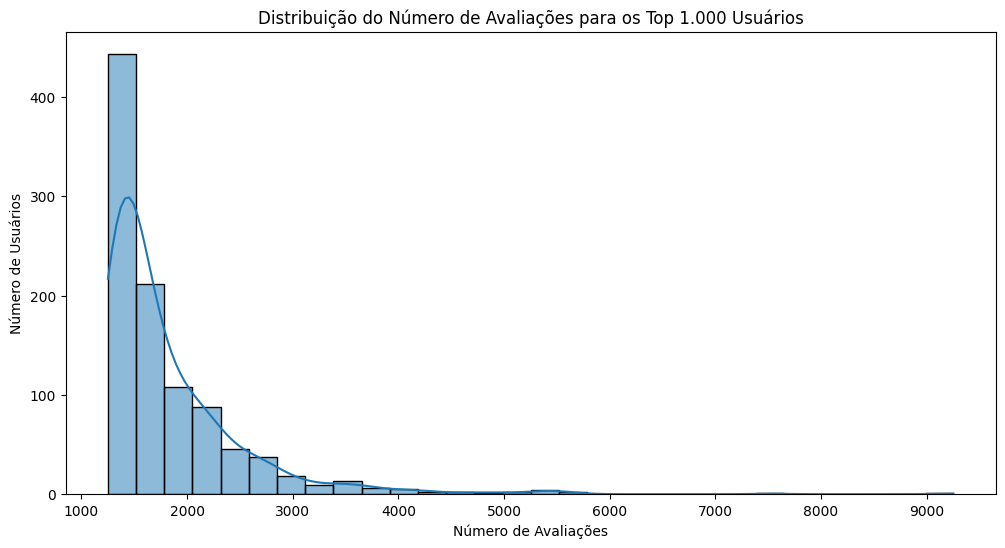

In [19]:
# Contabilize o número de avaliações por userId
user_ratings_count = df_movie_rating['userId'].value_counts().reset_index()
user_ratings_count.columns = ['userId', 'num_ratings']

# Ordene os usuários pelo número de avaliações em ordem decrescente
user_ratings_count_sorted = user_ratings_count.sort_values(by='num_ratings', ascending=False)

# Selecione os top 1.000 usuários com o maior número de avaliações
top_1000_users = user_ratings_count_sorted.head(1000)


# Crie o gráfico para os top 1.000 usuários
plt.figure(figsize=(12, 6))
sns.histplot(top_1000_users['num_ratings'], bins=30, kde=True)

# Adicione títulos e rótulos
plt.title('Distribuição do Número de Avaliações para os Top 1.000 Usuários')
plt.xlabel('Número de Avaliações')
plt.ylabel('Número de Usuários')

# Exiba o gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-23-5e10e35e209a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='average_rating', data=top_30_movies_with_titles, palette='viridis')


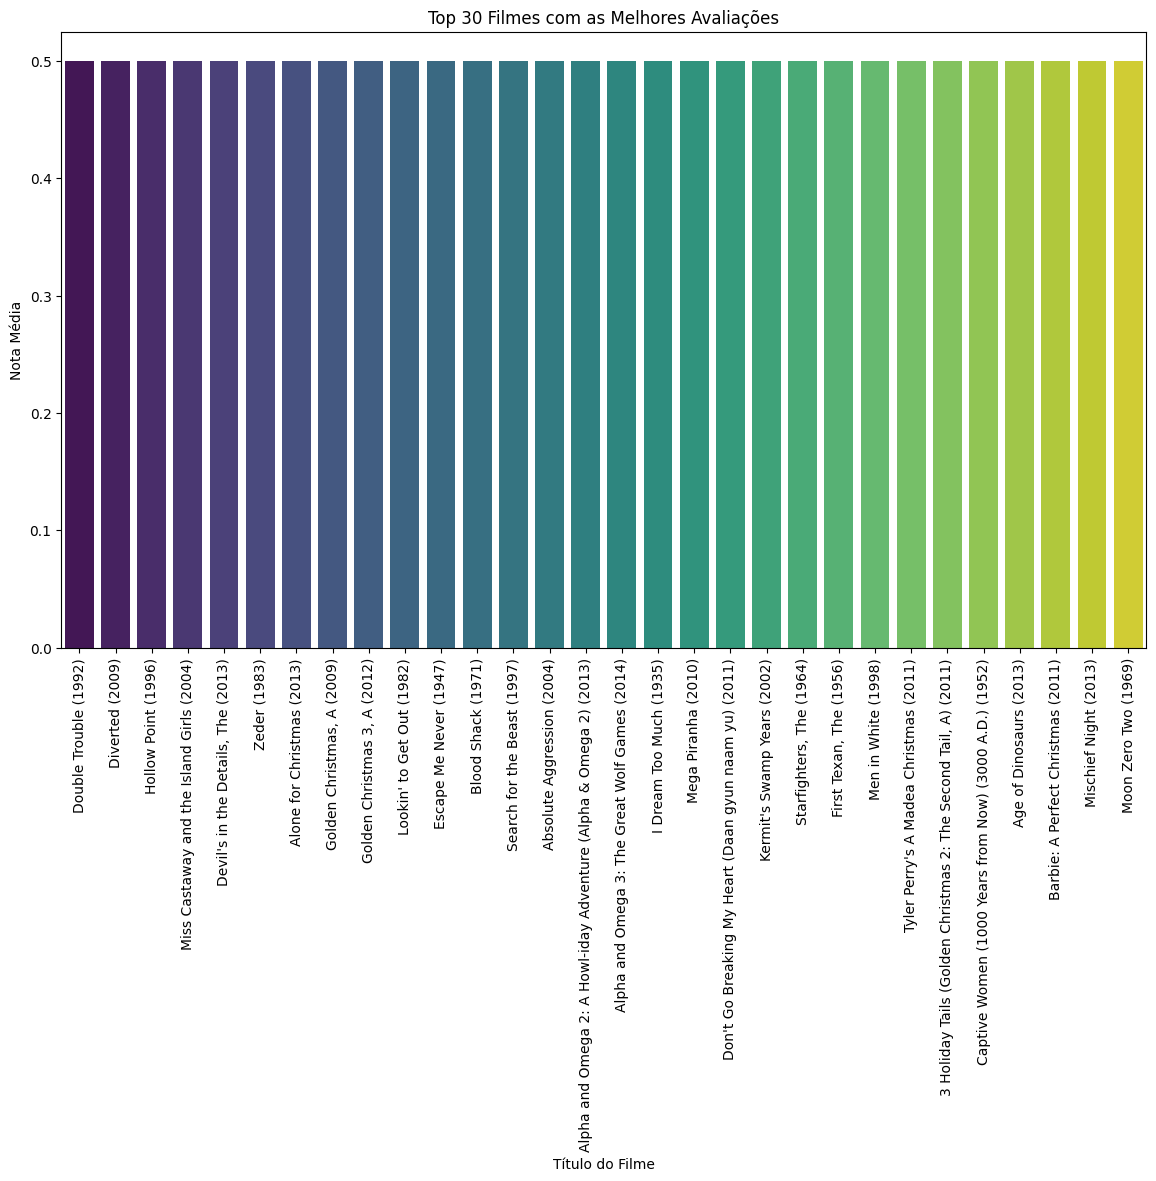

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que você tenha os DataFrames movie e rating
# movie = pd.read_csv('movie.csv')
# rating = pd.read_csv('rating.csv')

# Calcule a média das avaliações para cada filme
movie_ratings = df_movie_rating.groupby('movieId')['rating'].mean().reset_index()
movie_ratings.columns = ['movieId', 'average_rating']

# Classifique os filmes pela média das avaliações e selecione os top 30
top_30_movies = movie_ratings.sort_values(by='average_rating', ascending=False).head(30)

# Junte os dados com os nomes dos filmes
top_30_movies_with_titles = pd.merge(top_30_movies, df_movie[['movieId', 'title']], on='movieId')

# Crie o gráfico
plt.figure(figsize=(14, 8))
sns.barplot(x='title', y='average_rating', data=top_30_movies_with_titles, palette='viridis')

# Adicione títulos e rótulos
plt.title('Top 30 Filmes com as Melhores Avaliações')
plt.xlabel('Título do Filme')
plt.ylabel('Nota Média')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor leitura

# Exiba o gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-24-d01eaa5108a8>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='average_rating', data=top_30_movies_with_titles, palette='viridis')


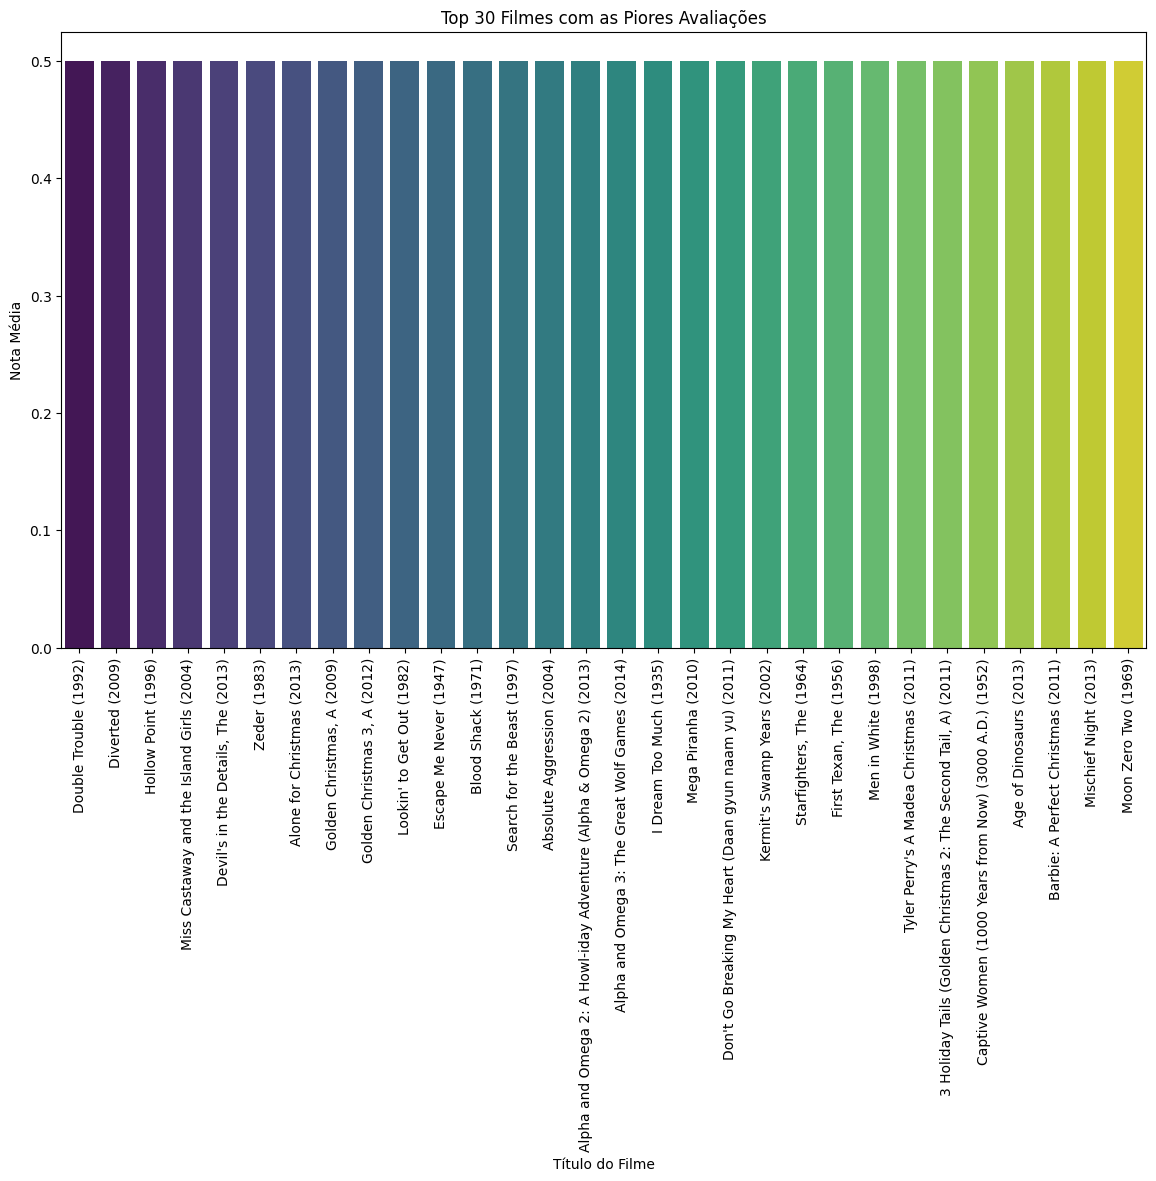

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcule a média das avaliações para cada filme
movie_ratings = df_movie_rating.groupby('movieId')['rating'].mean().reset_index()
movie_ratings.columns = ['movieId', 'average_rating']

# Classifique os filmes pela média das avaliações e selecione os top 30
top_30_movies = movie_ratings.sort_values(by='average_rating', ascending=True).head(30)

# Junte os dados com os nomes dos filmes
top_30_movies_with_titles = pd.merge(top_30_movies, df_movie[['movieId', 'title']], on='movieId')

# Crie o gráfico
plt.figure(figsize=(14, 8))
sns.barplot(x='title', y='average_rating', data=top_30_movies_with_titles, palette='viridis')

# Adicione títulos e rótulos
plt.title('Top 30 Filmes com as Piores Avaliações')
plt.xlabel('Título do Filme')
plt.ylabel('Nota Média')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor leitura

# Exiba o gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-25-d69e17884628>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_bin', y='count', data=rating_distribution, palette='viridis')


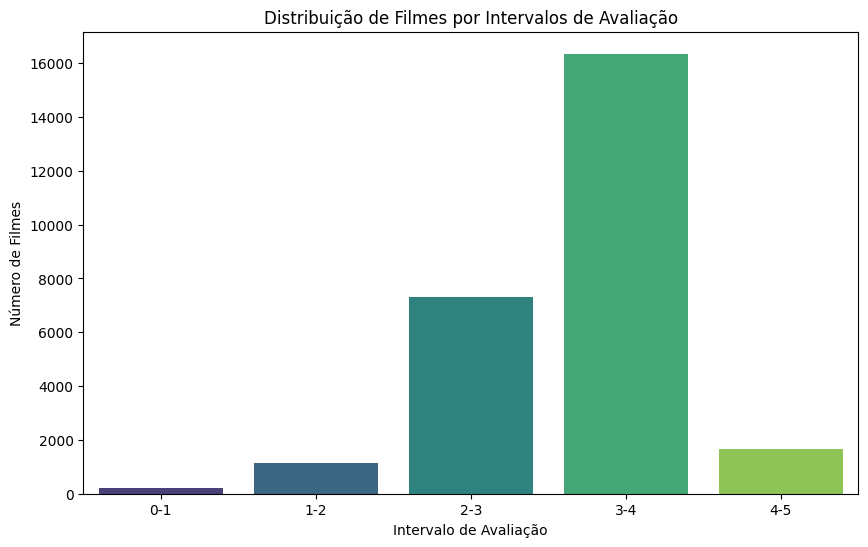

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calcule a média das avaliações para cada filme
movie_ratings = df_movie_rating.groupby('movieId')['rating'].mean().reset_index()
movie_ratings.columns = ['movieId', 'average_rating']

# Defina os intervalos de avaliação
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']

# Crie uma nova coluna com o intervalo de avaliação
movie_ratings['rating_bin'] = pd.cut(movie_ratings['average_rating'], bins=bins, labels=labels, right=False)

# Conte o número de filmes em cada intervalo
rating_distribution = movie_ratings['rating_bin'].value_counts().sort_index().reset_index()
rating_distribution.columns = ['rating_bin', 'count']

# Crie o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='rating_bin', y='count', data=rating_distribution, palette='viridis')

# Adicione títulos e rótulos
plt.title('Distribuição de Filmes por Intervalos de Avaliação')
plt.xlabel('Intervalo de Avaliação')
plt.ylabel('Número de Filmes')

# Exiba o gráfico
plt.show()

In [9]:
different_movies_count = df_movie_rating['movieId'].value_counts()

# Selecionar os 15 valores mais frequentes
top_15_movies = different_movies_count.head(30).index.tolist()
print(top_15_movies)

# Filtrar a tabela de filmes para obter os detalhes dos filmes mais frequentes
top_movies = df_movie[df_movie['movieId'].isin(top_15_movies)]

# Exibir os resultados
print(top_movies[['movieId', 'title']])

[296, 356, 318, 593, 480, 260, 110, 589, 2571, 527, 1, 457, 150, 780, 50, 1210, 592, 1196, 2858, 32, 590, 1198, 608, 47, 380, 588, 377, 1270, 858, 2959]
      movieId                                              title
0           1                                   Toy Story (1995)
31         32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
46         47                        Seven (a.k.a. Se7en) (1995)
49         50                         Usual Suspects, The (1995)
108       110                                  Braveheart (1995)
148       150                                   Apollo 13 (1995)
257       260          Star Wars: Episode IV - A New Hope (1977)
293       296                                Pulp Fiction (1994)
315       318                   Shawshank Redemption, The (1994)
352       356                                Forrest Gump (1994)
373       377                                       Speed (1994)
376       380                                   True Lies (1994)
45

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Exibir os filmes mais avaliados
print('*** FILMES ***\n')
print('ID     NOME')
print('-------------------------------------------------')

for index, row in top_movies.iterrows():
  if 0 <= row['movieId'] < 10:
    print(f"{row['movieId']}      {row['title']}")
  elif 10 <= row['movieId'] < 100:
    print(f"{row['movieId']}     {row['title']}")
  elif 100 <= row['movieId'] < 1000:
    print(f"{row['movieId']}    {row['title']}")
  elif 1000 <= row['movieId'] < 10000:
    print(f"{row['movieId']}   {row['title']}")
  elif 10000 <= row['movieId'] < 100000:
    print(f"{row['movieId']}  {row['title']}")

*** FILMES ***

ID     NOME
-------------------------------------------------
1      Toy Story (1995)
32     Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
47     Seven (a.k.a. Se7en) (1995)
50     Usual Suspects, The (1995)
110    Braveheart (1995)
150    Apollo 13 (1995)
260    Star Wars: Episode IV - A New Hope (1977)
296    Pulp Fiction (1994)
318    Shawshank Redemption, The (1994)
356    Forrest Gump (1994)
377    Speed (1994)
380    True Lies (1994)
457    Fugitive, The (1993)
480    Jurassic Park (1993)
527    Schindler's List (1993)
588    Aladdin (1992)
589    Terminator 2: Judgment Day (1991)
590    Dances with Wolves (1990)
592    Batman (1989)
593    Silence of the Lambs, The (1991)
608    Fargo (1996)
780    Independence Day (a.k.a. ID4) (1996)
858    Godfather, The (1972)
1196   Star Wars: Episode V - The Empire Strikes Back (1980)
1198   Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
1210   Star Wars: Episode VI - Return of the Jedi (1983)
127

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Adicionando o novo usuário e suas avaliações (para os filmes escolhidos por ele)

new_ratings = pd.DataFrame([
    {'userId': 138494, 'movieId': 588, 'rating': 5},
    {'userId': 138494, 'movieId': 1, 'rating': 4},
])

# Concatenando o novo DataFrame com o original
df_movie_rating = pd.concat([df_movie_rating, new_ratings], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Gerando lista de transações
transaction_list = df_movie_rating.groupby('userId')['movieId'].apply(list)
print(transaction_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


userId
1         [2, 29, 32, 47, 50, 112, 151, 223, 253, 260, 2...
2         [3, 62, 70, 110, 242, 260, 266, 469, 480, 541,...
3         [1, 24, 32, 50, 160, 173, 175, 196, 223, 260, ...
4         [6, 10, 19, 32, 165, 329, 350, 356, 367, 368, ...
5         [2, 11, 17, 60, 62, 104, 110, 140, 141, 150, 2...
                                ...                        
138490    [17, 21, 32, 34, 41, 73, 82, 85, 110, 111, 123...
138491    [1, 362, 374, 720, 1093, 1103, 1373, 1388, 196...
138492    [21, 58, 69, 163, 246, 357, 441, 471, 858, 908...
138493    [1, 2, 18, 19, 34, 48, 70, 107, 110, 150, 179,...
138494                                             [588, 1]
Name: movieId, Length: 138494, dtype: object


In [13]:
# Converter a lista de transações para o formato necessário para o Apriori
from mlxtend.frequent_patterns import apriori, association_rules
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicar Apriori
frequent_itemsets = apriori(df_transactions, min_support=0.18, use_colnames=True)

# Gerar as regras de associação
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Exibir as regras de associação
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     antecedents      consequents   support  confidence      lift
0           (32)              (1)  0.182196    0.560983  1.563360
1            (1)             (32)  0.182196    0.507747  1.563360
2            (1)            (110)  0.192037    0.535174  1.378459
3            (1)            (260)  0.224710    0.626227  1.591295
4          (260)              (1)  0.224710    0.571007  1.591295
...          ...              ...       ...         ...       ...
1807  (480, 589)       (593, 356)  0.194203    0.651140  2.032707
1808  (593, 356)       (480, 589)  0.194203    0.606257  2.032707
1809  (593, 589)       (480, 356)  0.194203    0.732881  2.175582
1810  (356, 589)       (480, 593)  0.194203    0.687104  2.345628
1811       (589)  (480, 593, 356)  0.194203    0.514815  2.044762

[1812 rows x 5 columns]


In [15]:
# Filtrar regras relevantes para o novo usuário
user_id = 138494
user_movies = set(df_movie_rating[df_movie_rating['userId'] == user_id]['movieId'].unique())
relevant_rules = rules[rules['antecedents'].apply(lambda x: not user_movies.isdisjoint(x))]

# Extrair os filmes recomendados dos consequentes
recommended_movies = set()
for consequents in relevant_rules['consequents']:
    recommended_movies.update(consequents)

recommended_movies = recommended_movies - user_movies

top_3_recommendations = list(recommended_movies)[:3]

# Exibir as recomendações para o novo usuário
print(f"Recomendações de filmes para o usuário {user_id}:")
filtered_df = df_movie[df_movie["movieId"].isin(top_3_recommendations)][["title", "genres"]]
print(filtered_df)

Recomendações de filmes para o usuário 138494:
                                          title                   genres
257   Star Wars: Episode IV - A New Hope (1977)  Action|Adventure|Sci-Fi
453                        Fugitive, The (1993)                 Thriller
2486                         Matrix, The (1999)   Action|Sci-Fi|Thriller


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
